In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Home Values DF set-up (4 files)


In [6]:
#Vital Statistics DF set-up (4 files)
# Infant Mortality Rate
# Creating Paths
infant_kentcsv = "datasets/KentVitalStatistics.csv"
infant_oaklandcsv = "datasets/OaklandVitalStatistics.csv"
infant_muskegoncsv = "datasets/MuskegonVitalStatistics.csv"
infant_saginawcsv = "datasets/SaginawVitalStatistics.csv"

# Read with Pandas
infant_kent_df = pd.read_csv(infant_kentcsv)
infant_oakland_df = pd.read_csv(infant_oaklandcsv)
infant_muskegon_df = pd.read_csv(infant_muskegoncsv)
infant_saginaw_df = pd.read_csv(infant_saginawcsv)
# infant_kent_df.head()
# infant_muskegon_df.head()
# infant_oakland_df.head()
# infant_saginaw_df.head()

# Merging DataFrame
combined_df = pd.merge(infant_kent_df ,infant_muskegon_df,
                                  how='left', on=['State','Year'])
  
combined_df = combined_df.rename(columns={"County_x":"County1",
                                          "Infant Deaths_x":"Infant_Deaths_Kent",
                                          "Live Births_x":"Live_Births_Kent",
                                          "County_y":"County2",
                                          "Infant Deaths_y":"Infant_Deaths_Muskegon",
                                          "Live Births_y":"Live_Births_Muskegon",
                                                        })
combined_df 
combined_df = combined_df[["Year","State","County1","Infant_Deaths_Kent","Live_Births_Kent",
                             "County2","Infant_Deaths_Muskegon","Live_Births_Muskegon"]]
combined_df 

combined_df1 = pd.merge(infant_oakland_df ,infant_saginaw_df ,
                                    how='left', on=['State','Year'])
combined_df1 
combined_df1 = combined_df1.rename(columns={"County_x":"County3",
                                          "Infant Deaths_x":"Infant_Deaths_Oakland",
                                          "Live Births_x":"Live_Births_Oakland",
                                          "County_y":"County4",
                                          "Infant Deaths_y":"Infant_Deaths_Saginaw",
                                          "Live Births_y":"Live_Births_Saginaw",
                                                        })
combined_df1
infant_mortality=pd.merge(combined_df,combined_df1,how='left', on=['State','Year'])
infant_mortality


,Year,State,County1,Infant_Deaths_Kent,Live_Births_Kent,County2,Infant_Deaths_Muskegon,Live_Births_Muskegon,County3,Infant_Deaths_Oakland,Live_Births_Oakland,County4,Infant_Deaths_Saginaw,Live_Births_Saginaw
0,2022,Michigan,Kent,41,7898,Muskegon,12,1857,Oakland,42,12402,Saginaw,17,1904
1,2021,Michigan,Kent,40,8203,Muskegon,14,1868,Oakland,62,12879,Saginaw,10,2018
2,2020,Michigan,Kent,55,8180,Muskegon,12,1883,Oakland,62,12305,Saginaw,26,2002
3,2019,Michigan,Kent,51,8176,Muskegon,9,1954,Oakland,53,12899,Saginaw,18,2118
4,2018,Michigan,Kent,41,8613,Muskegon,12,2051,Oakland,79,13152,Saginaw,19,2192
5,2017,Michigan,Kent,46,8684,Muskegon,15,2125,Oakland,71,13184,Saginaw,10,2248
6,2016,Michigan,Kent,56,8795,Muskegon,20,2132,Oakland,72,13627,Saginaw,27,2192
7,2015,Michigan,Kent,56,8823,Muskegon,18,2082,Oakland,71,13547,Saginaw,19,2254
8,2014,Michigan,Kent,52,8886,Muskegon,15,2084,Oakland,83,13454,Saginaw,21,2259
9,2013,Michigan,Kent,39,8832,Muskegon,18,2130,Oakland,90,13445,Saginaw,19,2289


In [7]:
# Calculating Infant mortality rate
infant_mortality["Kent_mortalityrate"]= np.round(((infant_mortality["Infant_Deaths_Kent"]/infant_mortality["Live_Births_Kent"])*1000),decimals=2)
infant_mortality["Muskegon_mortalityrate"]= np.round(((infant_mortality["Infant_Deaths_Muskegon"]/infant_mortality["Live_Births_Muskegon"])*1000),decimals=2)
infant_mortality["Oakland_mortalityrate"]= np.round(((infant_mortality["Infant_Deaths_Oakland"]/infant_mortality["Live_Births_Oakland"])*1000),decimals=2)
infant_mortality["Saginaw_mortalityrate"]= np.round(((infant_mortality["Infant_Deaths_Saginaw"]/infant_mortality["Live_Births_Saginaw"])*1000),decimals=2)

# Creating New dataframe
infant_mortality_df = infant_mortality[["Year","County1","Kent_mortalityrate","County2","Muskegon_mortalityrate",
                                        "County3","Oakland_mortalityrate","County4","Saginaw_mortalityrate"]]
infant_mortality_df

,Year,County1,Kent_mortalityrate,County2,Muskegon_mortalityrate,County3,Oakland_mortalityrate,County4,Saginaw_mortalityrate
0,2022,Kent,5.19,Muskegon,6.46,Oakland,3.39,Saginaw,8.93
1,2021,Kent,4.88,Muskegon,7.49,Oakland,4.81,Saginaw,4.96
2,2020,Kent,6.72,Muskegon,6.37,Oakland,5.04,Saginaw,12.99
3,2019,Kent,6.24,Muskegon,4.61,Oakland,4.11,Saginaw,8.50
4,2018,Kent,4.76,Muskegon,5.85,Oakland,6.01,Saginaw,8.67
5,2017,Kent,5.30,Muskegon,7.06,Oakland,5.39,Saginaw,4.45
6,2016,Kent,6.37,Muskegon,9.38,Oakland,5.28,Saginaw,12.32
7,2015,Kent,6.35,Muskegon,8.65,Oakland,5.24,Saginaw,8.43
8,2014,Kent,5.85,Muskegon,7.20,Oakland,6.17,Saginaw,9.30
9,2013,Kent,4.42,Muskegon,8.45,Oakland,6.69,Saginaw,8.30


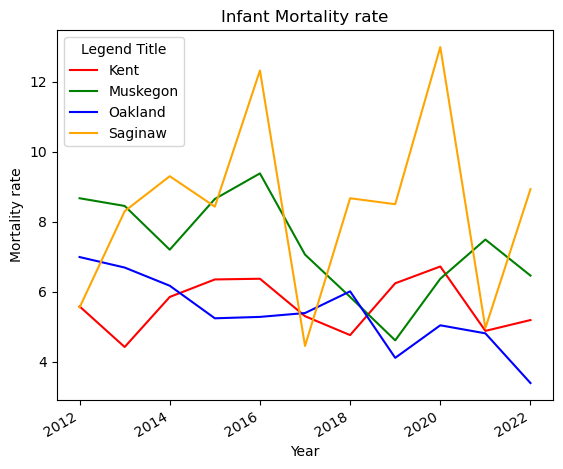

In [8]:
# plotting the time series of infant mortality rate in Kent county 
plt.plot(infant_mortality_df["Year"], infant_mortality_df["Kent_mortalityrate"],color='red')
 
# plotting the time series of infant mortality rate in Muskegon county
plt.plot(infant_mortality_df["Year"], infant_mortality_df["Muskegon_mortalityrate"], color='green')

# plotting the time series of infant mortality rate in Oakland county
plt.plot(infant_mortality_df["Year"], infant_mortality_df["Oakland_mortalityrate"], color='blue')

# plotting the time series of infant mortality rate in Saginaw county
plt.plot(infant_mortality_df["Year"], infant_mortality_df["Saginaw_mortalityrate"], color='orange')
 
# Giving title to the graph
plt.title('Infant Mortality rate')
 
# rotating the x-axis tick labels at 30degree 
# towards right
plt.xticks(rotation=30, ha='right')
 
# Giving x and y label to the graph
plt.xlabel('Year')
plt.ylabel('Mortality rate')
plt.legend(['Kent', 'Muskegon', 'Oakland', 'Saginaw'], loc='upper left', title='Legend Title')
plt.show()

In [ ]:
#Median Rent Over Time DF set-up (1 file)


In [ ]:
#Population by Race DF set-up (1 file)


In [35]:
#Health Insurance Percentage DF set-up

insurance_rates_csv = "datasets/health_data.csv"

insurance_rates_df = pd.read_csv(insurance_rates_csv)
insurance_rates_df = insurance_rates_df.drop('Rank within US (of 3141 counties)', axis = 1)

insurance_rates_df.head()

,County,Insured (Percent),Insured (People)
0,Michigan,92.2,5425739
1,Kent County,91.3,366434
2,Saginaw County,92.3,97773
3,Muskegon County,92.7,92142
4,Oakland County,94.1,729657


In [36]:
insurance_rates_df.set_index('County', inplace = True)
# insurance_rates_df.head()
insurance_rates_df = insurance_rates_df.drop('Insured (People)', axis = 1)

<function matplotlib.pyplot.show(close=None, block=None)>

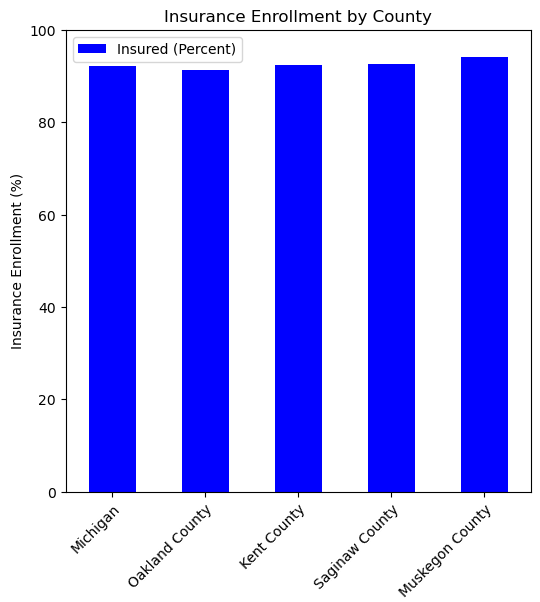

In [37]:
insurance_figure = insurance_rates_df.plot(kind = "bar", facecolor = "blue", figsize = (6, 6),
                                          title = "Insurance Enrollment by County",
                                          xlabel = "Counties vs. State Average",
                                          ylabel = "Insurance Enrollment (%)")
xticklabels = broadband_rates_df.index
insurance_figure.set_xticklabels(xticklabels, rotation = 45, rotation_mode = "anchor", ha = "right", wrap = True)
plt.ylim(0, 100)
plt.show

In [25]:
#Broadband Availability Percentage DF set-up

broadband_rates_csv = "datasets/broadband_data.csv"

broadband_rates_df = pd.read_csv(broadband_rates_csv)
broadband_rates_df = broadband_rates_df.drop(broadband_rates_df.columns[[1]], axis=1)

broadband_rates_df.head()

,County,Percent
0,Michigan,86
1,Oakland County,92
2,Kent County,89
3,Saginaw County,84
4,Muskegon County,83


In [26]:
broadband_rates_df.set_index('County', inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

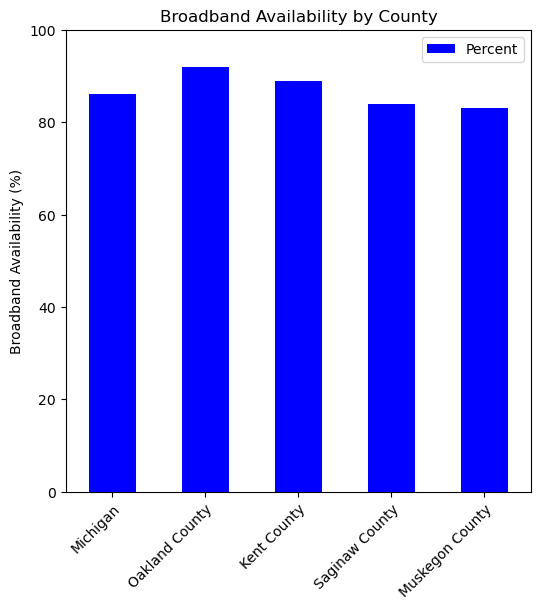

In [29]:
broadband_figure = broadband_rates_df.plot(kind = "bar", facecolor = "blue", figsize = (6, 6),
                                          title = "Broadband Availability by County",
                                          xlabel = "Counties vs. State Average",
                                          ylabel = "Broadband Availability (%)")
xticklabels = broadband_rates_df.index
broadband_figure.set_xticklabels(xticklabels, rotation = 45, rotation_mode = "anchor", ha = "right", wrap = True)
plt.ylim(0, 100)
plt.show